#  Assignment - 06 
submitted by : <br>
Archit Kumar <br>
2018201051

### some required function 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
np.random.seed(1)


In [2]:
np.random.seed(1)
class convLayer():
    def __init__ (self,filter_size, number_of_filters ,stride,pad = 0 , pad_value = 0 , activation = "tanh") :
        self.p = pad_value
        self.pad = pad
        self.f = filter_size
        self.n_C = number_of_filters
        self.stride = stride
        self.W = None
        self.b = None
        self.activation = activation
    def padding(self , X):
        return np.pad(X, ((0,0), (self.pad , self.pad) , (self.pad , self.pad) , (0,0)) , 'constant' , constant_values = (self.p , self.p))
    
    def conv_single_step(self , a ,w , b):
        temp = np.sum(a*w)
        return temp + float(np.asscalar(b))
    
    def activate(self , Z):
        if self.activation == "tanh" :
            return np.tanh(Z)
        elif self.activation == "sigmoid" :
            return 1./(1+np.exp(-Z))
        elif self.actvation == "relu":
            return np.where(Z >= 0 , Z , 0)
        
        
    
    def fit(self , X):
        '''
        X is (m , n_H , n_W , n_C_img)
        m = no of examples 
        '''
        if self.pad > 0 :
            X = self.padding(X)
        m , n_H_prev , n_W_prev, n_Cprev = X.shape
        self.W = np.random.randn(self.f,self.f, n_Cprev, self.n_C)
        self.b = np.random.randn(1,1,1,self.n_C)
        f  = self.f
        n_C = self.n_C
        stride = self.stride
        
        n_H = int((n_H_prev  - f )/stride) + 1
        n_W = int((n_W_prev -f )/stride) + 1


        Z = np.zeros((m,n_H,  n_W ,n_C))
        for i in range(m):
            for h in range(n_H):
                for w in range(n_W):
                    for c in range(n_C):
                        vert_s = h*stride
                        vert_end = h*stride + f
                        horiz_s=  w*stride
                        horiz_end = w*stride + f
                        a_slice = X[i,vert_s:vert_end, horiz_s:horiz_end ,:]
                        Z[i , h , w, c] = self.conv_single_step(a_slice , self.W[:,:,:,c] , self.b[:,:,:,c])
        return self.activate(Z)
        
        

In [3]:
class pooling():
    def __init__(self,filter_size ,stride, pooling_type = "max"):
        self.f = filter_size
        self.stride = stride
        self.pooling_type = pooling_type
        
    def fit(self , X):
        m , n_H_prev, n_W_prev ,n_C_prev = X.shape
        n_H  = int(1 + (n_H_prev - self.f)/self.stride)
        n_W =  int(1 + (n_W_prev - self.f)/self.stride)
        n_C = n_C_prev
        Z = np.zeros((m,n_H , n_W ,n_C))
        
        for i in range(m):
            for h in range(n_H):
                for w in range(n_W):
                    for c in range(n_C):
                        ver_start = self.stride*h
                        ver_end = self.stride*h + self.f
                        horiz_start = self.stride*w 
                        horiz_end = self.stride*w + self.f
                        
                        a_slice = X[i,ver_start : ver_end , horiz_start : horiz_end , c]
                        if self.pooling_type == "max":
                            Z[i, h ,w, c] = np.max(a_slice)
                        elif self.pooling_type == "avg":
                            Z[i ,  h ,  w ,c] = np.mean(a_slice)
        return Z
                            
                        
        

In [4]:
class full_layer():
    def __init__ (self, nodes,nodes_preLayer ,activation = "sigmoid") :
        self.W = np.random.randn(nodes, nodes_preLayer)
        self.b = np.random.randn(nodes ,1)
        self.activation = activation
        
    def fit(self, X):
        Z = np.dot(self.W , X.T) + self.b
        if self.activation == "relu" :
            Z =  np.where(Z >= 0 , Z , 0)
        elif self.activation == "tanh" :
            Z = np.tanh(Z)
        elif self.activation == "sigmoid":
            Z = 1./(1 + np.exp(-Z))
        elif self.activation == "softmax" :
            temp = np.exp(Z)
            temp1 = np.sum(temp , axis = 0)
            Z = np.divide(temp , temp1 , dtype = "float")
        return Z
    
            
            
        

## Question 1 :    LENET 5 forward Pass

<img src = "lenet2.jpg" style = "width : 500px ; height : 300px">
<img src = "lenet.png">


###  SAMPLE INPUT DATA 

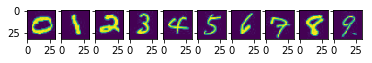

Input array dimensions
(10, 32, 32, 1)


In [38]:
X = []
fig ,axes = plt.subplots(1, 10 , sharex = True , sharey = True)
for i in range(10):
    img = cv2.imread("imgs/" +str(i) +".jpg" , 0)
    img = cv2.resize(img , (32,32))
    axes[i].imshow(img)
    img = img.reshape(img.shape[0] , img.shape[1] , 1)
    X.append(img.copy())

plt.show()
X  = np.array(X)
print("Input array dimensions")
print(X.shape)

### C1 :  Convolution
#### Input : 10 * 32 * 32 * 1 ,   filter : 6 @ 5 * 5  * 1 , stride  :  1 ,  output  :  10 * 28 * 28 * 6     , activation : tanh

In [6]:
c1 = convLayer(5,6,1)
Z1 = c1.fit(X)
print(Z1.shape)

(10, 28, 28, 6)


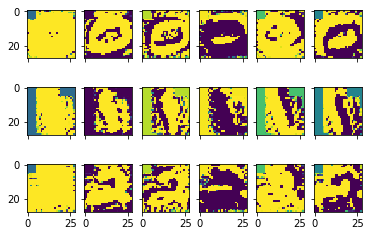

In [37]:
fig ,axes = plt.subplots(3, 6 , sharex = True , sharey = True)
for i in range(3):
    for j in range(6):
        axes[i,j].imshow(Z1[i,:,:,j])
plt.show()

### S2 : Max Pooling 
#### Input : 10 * 28 * 28 * 6  , filter : 2 * 2 , stride : 2 ,  output : 10 * 14 * 14  * 6    

In [9]:
s2 = pooling(2, 2, "max")
Z2 = s2.fit(Z1)
print(Z2.shape)

(10, 14, 14, 6)


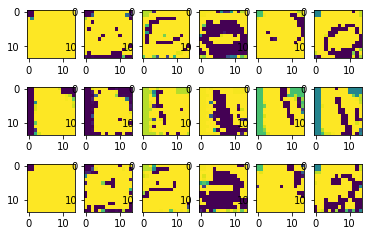

In [11]:
fig ,axes = plt.subplots(3,6)
for i in range(3):
    for j in range(6):
        axes[i,j].imshow(Z2[i,:,:,j])
plt.show()

###  C3 : Convolution
#### Input : 10 * 14 * 14 * 6 , Filter : 16 @  5 * 5 * 6  , Stride : 1 , Output : 10 * 10 * 10 * 16  , actvation : tanh

In [13]:
c3 = convLayer(5,16,1)
Z3 = c3.fit(Z2)
print(Z3.shape)

(10, 10, 10, 16)


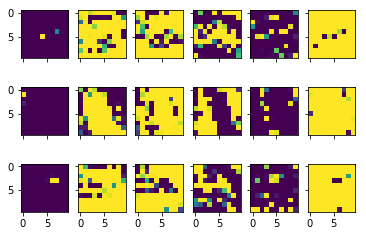

In [36]:
fig ,axes = plt.subplots(3, 6 , sharex = True , sharey = True)
for i in range(3):
    for j in range(6):
        axes[i,j].imshow(Z3[i,:,:,j])
plt.show()

### S4 : Max Pooling
#### Input : 10 * 10 * 10 *  16 , Filter : 2 * 2 , Stride : 2 , Output : 10 * 5 * 5 * 16 

In [17]:
s4 = pooling(2,2,"avg")
Z4 = s4.fit(Z3)
print(Z4.shape)

(10, 5, 5, 16)


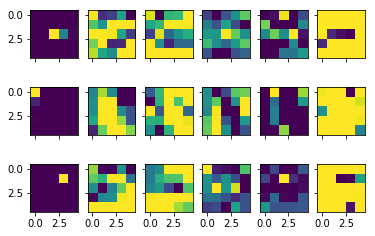

In [35]:
fig ,axes = plt.subplots(3, 6 , sharex = True , sharey = True)
for i in range(3):
    for j in range(6):
        axes[i,j].imshow(Z4[i,:,:,j])
plt.show()

### C5 : Convolution 
#### Input : 10 * 5 * 5 * 16 , Filter : 120 @ 5 * 5 * 16 , Stride : 1 , Output : 10 * 1 * 1 * 120 , activation : sigmoid

In [33]:
c5 = convLayer(5,120,1 , activation  ="sigmoid")
Z5 = c5.fit(Z4)
print(Z5.shape)

(10, 1, 1, 120)


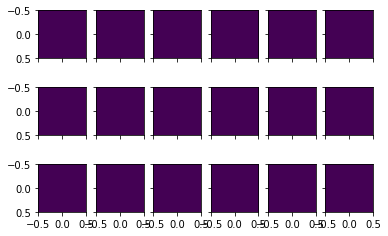

In [34]:
fig ,axes = plt.subplots(3, 6 , sharex = True , sharey = True)
for i in range(3):
    for j in range(6):
        axes[i,j].imshow(Z5[i,:,:,j])
plt.show()

###  F6 : Full Connection 
#### Input : 10 * 1 * 1 * 120  ---(reshaped)----> 10 * 120 , NO of Nodes : 84 , Output : 84 * 10 , activation :  tanh  

In [26]:
Z5 = Z5.reshape(Z5.shape[0] , Z5.shape[1]*Z5.shape[2]*Z5.shape[3])
print("new shape of Z5 : " , Z5.shape)
F6 = full_layer(84, Z5.shape[1] , "tanh")
Z6 = F6.fit(Z5)
print("Output Shape : "  , Z6.shape)

new shape of Z5 :  (10, 120)
Output Shape :  (84, 10)


###  F7 : Full Connection 
#### Input : 84 * 10  , No of Nodes : 10 , Output : 10 * 10 , activation : softmax 

In [25]:
F7 = full_layer(10 , Z6.shape[0] , "softmax")
Z7 = F7.fit(Z6.T)
print("Output shape : " ,  Z7.shape)

Output shape :  (10, 10)


##  Question 2 :

### 1.  No of parameters in 1st convolution layer  

 = ( filter size )$^2 * $ no of channels in input $ * $ no of filters $ + $ no of filters ( no of base )  

### 2. No of parameters in pooling operation  


= 0 (only filter dimensions are required ) 

### 3. No of parameters  

Activtion Functions = Pooling layer < Convolution Layer < Fully Connected Layer  

### 4. Memory Consumption  

in general : <br>
convolution Layers < Fully Connected Layers <br>
but in some cases : (ex : starting conv layers , ending fully connected layers)<br>
convolution Layers > Fully Connected Layers